In [69]:
import pandas as pd
import numpy as np

# Parameters

In [70]:
file_path_desc = "D:/Data challenge/columns_description.xlsx"
file_path_data = "D:/Data challenge/competition_table.xlsx"

# Data input

In [71]:
data = pd.read_excel(file_path_data)
data 
# Ötletek:
# div bontás,odds pontosság features, odds alapján score hozzánézni eredményt, attack defense feature idő alapon - div és season használat
# random forest, NB, xg

,match_id,season,div,odds_home_team_win,odds_draw,odds_away_team_win,home_team_match_nr,home_team_goal_roll1_sum,home_team_goal_roll2_sum,home_team_goal_roll3_sum,...,odds_away_team_draw_roll4_mean,odds_away_team_defeat_roll1_mean,odds_away_team_defeat_roll2_mean,odds_away_team_defeat_roll3_mean,odds_away_team_defeat_roll4_mean,away_team_point_mean,away_team_expected_point_mean,home_win_flag,draw_flag,away_win_flag
0,0,2008-2009,div0,1.73,3.50,5.00,5,3,7,8,...,3.825,11.00,7.665,6.377,5.908,0.500,3.000,0,0,1
1,1,2008-2009,div0,1.25,5.50,12.00,7,0,2,5,...,3.582,2.10,2.250,2.833,2.475,0.333,0.000,0,1,0
2,2,2008-2009,div0,1.57,3.80,5.75,9,1,4,4,...,3.525,6.75,4.275,3.883,3.638,0.750,1.500,1,0,0
3,3,2008-2009,div0,1.17,7.00,15.00,11,2,6,7,...,3.975,4.20,2.750,2.333,2.550,0.600,0.000,1,0,0
4,4,2008-2009,div0,1.17,7.00,15.00,14,2,4,7,...,3.925,3.10,2.175,2.050,2.015,0.833,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64161,64395,2021-2022,div18,3.80,3.71,1.90,30,0,1,3,...,3.558,5.04,3.695,3.337,3.043,0.929,0.429,0,0,1
64162,64396,2021-2022,div18,3.62,3.42,2.04,32,0,0,0,...,3.268,3.03,2.585,2.740,2.755,1.000,0.200,0,0,1
64163,64397,2021-2022,div18,5.51,4.06,1.59,34,0,0,0,...,3.625,4.19,3.860,3.943,3.458,1.312,0.750,0,0,1
64164,64398,2021-2022,div18,3.83,3.76,1.87,36,1,3,3,...,3.738,2.04,1.800,1.883,1.915,0.412,0.000,0,0,1


# EDA

In [72]:
data.shape

(64166, 167)

In [73]:
data.columns

Index(['match_id', 'season', 'div', 'odds_home_team_win', 'odds_draw',
       'odds_away_team_win', 'home_team_match_nr', 'home_team_goal_roll1_sum',
       'home_team_goal_roll2_sum', 'home_team_goal_roll3_sum',
       ...
       'odds_away_team_draw_roll4_mean', 'odds_away_team_defeat_roll1_mean',
       'odds_away_team_defeat_roll2_mean', 'odds_away_team_defeat_roll3_mean',
       'odds_away_team_defeat_roll4_mean', 'away_team_point_mean',
       'away_team_expected_point_mean', 'home_win_flag', 'draw_flag',
       'away_win_flag'],
      dtype='object', length=167)

In [74]:
print("Home win count: " + str(sum(data.home_win_flag)))
print("Draw count: " + str(sum(data.draw_flag)))
print("Away win count: " + str(sum(data.away_win_flag)))

Home win count: 28215
Draw count: 16797
Away win count: 19154


In [75]:
np.corrcoef(data.odds_home_team_win,data.home_win_flag)

array([[ 1.        , -0.24038676],
       [-0.24038676,  1.        ]])

In [76]:
np.corrcoef(data.odds_draw,data.draw_flag)

array([[ 1.        , -0.10020025],
       [-0.10020025,  1.        ]])

In [77]:
np.corrcoef(data.odds_away_team_win,data.away_win_flag)

array([[ 1.        , -0.22105208],
       [-0.22105208,  1.        ]])

# Train, test split

In [78]:
### Train

data_y1= data[data['home_win_flag']==1].reset_index(drop=True)
data_y0= data[data['home_win_flag']==0].reset_index(drop=True)

### home win col 164
data_to_train = pd.concat([data_y1[0:20000],data_y0[0:20000]], ignore_index=True)
X_train = data_to_train.iloc[:, 3:164].values
y_train = data_to_train.iloc[:, 164].values

### Test

data_to_test = pd.concat([data_y1[20000:28000],data_y0[20000:28000]], ignore_index=True)
X_test = data_to_test.iloc[:, 3:164].values
y_test = data_to_test.iloc[:, 164].values

# Modeling WIP

### Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [80]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [81]:
preds = clf.predict(X_test)
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
print (clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.621675
0.61225


In [84]:
from sklearn.metrics import confusion_matrix
import sklearn

sklearn.metrics.confusion_matrix(y_test, preds)

array([[5296, 2704],
       [3500, 4500]], dtype=int64)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


clf = RandomForestClassifier() 
clf.fit(X_train, y_train)

#print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

RandomForestClassifier()

In [88]:
clf.feature_importances_

array([0.02140424, 0.01219901, 0.02052284, 0.00748135, 0.00277954,
       0.00383364, 0.00459255, 0.00520359, 0.00317263, 0.00403933,
       0.00468812, 0.00503707, 0.00646322, 0.00712108, 0.00776785,
       0.0084152 , 0.00665626, 0.00733366, 0.00780274, 0.00817859,
       0.00515969, 0.00605546, 0.00643032, 0.00688297, 0.00517033,
       0.00619099, 0.00656774, 0.00745056, 0.00685614, 0.00723231,
       0.00751843, 0.00812333, 0.00660469, 0.007112  , 0.00734076,
       0.00791971, 0.0054523 , 0.00646547, 0.00702252, 0.00704112,
       0.00574937, 0.00640475, 0.00681666, 0.00742509, 0.00364289,
       0.00453187, 0.00510908, 0.00578486, 0.00335934, 0.0045536 ,
       0.0053946 , 0.00613318, 0.00078528, 0.00110687, 0.00142587,
       0.00171108, 0.00078875, 0.00110089, 0.0013938 , 0.0016088 ,
       0.0016344 , 0.00327476, 0.00419284, 0.00520728, 0.00076635,
       0.00214523, 0.00242985, 0.00464364, 0.00804222, 0.01021186,
       0.01262466, 0.01233479, 0.00562002, 0.00845051, 0.00921

In [89]:
importances = clf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = data.columns[4:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) odds_draw                      0.021404
 2) home_team_match_nr             0.020523
 3) home_team_point_mean           0.015493
 4) odds_away_team_draw_roll1_mean 0.013515
 5) odds_home_team_win_roll4_mean  0.012625
 6) away_team_point_mean           0.012582
 7) odds_home_team_defeat_roll3_mean 0.012443
 8) odds_home_team_defeat_roll4_mean 0.012407
 9) odds_home_team_draw_roll1_mean 0.012335
10) odds_away_team_win             0.012199
11) odds_away_team_win_roll4_mean  0.011281
12) odds_away_team_defeat_roll3_mean 0.010807
13) odds_away_team_defeat_roll4_mean 0.010682
14) odds_home_team_defeat_roll1_mean 0.010266
15) home_team_expected_point_mean  0.010220
16) odds_home_team_win_roll3_mean  0.010212
17) odds_away_team_win_roll3_mean  0.009980
18) away_team_expected_point_mean  0.009840
19) odds_home_team_draw_roll4_mean 0.009218
20) odds_away_team_defeat_roll1_mean 0.009202
21) odds_home_team_defeat_roll2_mean 0.008666
22) home_win_flag                  0.008567
23) odds_away_team

## Keras

In [91]:
from keras.models import Sequential
from keras.layers import Dense

In [92]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=161))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               20736     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 20,865
Trainable params: 20,865
Non-trainable params: 0
_________________________________________________________________


In [93]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8658 - accuracy: 0.5622 - val_loss: 0.8788 - val_accuracy: 0.5447
Epoch 2/100
400/400 [==============================] - 1s 1ms/step - loss: 0.7131 - accuracy: 0.5832 - val_loss: 0.6974 - val_accuracy: 0.5857
Epoch 3/100
400/400 [==============================] - 0s 1ms/step - loss: 0.7056 - accuracy: 0.5815 - val_loss: 0.7052 - val_accuracy: 0.5756
Epoch 4/100
400/400 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.5883 - val_loss: 0.7023 - val_accuracy: 0.5723
Epoch 5/100
400/400 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5926 - val_loss: 0.6553 - val_accuracy: 0.6034
Epoch 6/100
400/400 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5928 - val_loss: 0.6521 - val_accuracy: 0.6071
Epoch 7/100
400/400 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5882 - val_loss: 0.6639 - val_accuracy: 0.5982

Epoch 58/100
400/400 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.6312 - val_loss: 0.6781 - val_accuracy: 0.6010
Epoch 59/100
400/400 [==============================] - 1s 1ms/step - loss: 0.6323 - accuracy: 0.6331 - val_loss: 0.7085 - val_accuracy: 0.6038
Epoch 60/100
400/400 [==============================] - 1s 1ms/step - loss: 0.6323 - accuracy: 0.6310 - val_loss: 0.7244 - val_accuracy: 0.5901
Epoch 61/100
400/400 [==============================] - 1s 1ms/step - loss: 0.6327 - accuracy: 0.6330 - val_loss: 0.7028 - val_accuracy: 0.5972
Epoch 62/100
400/400 [==============================] - 1s 1ms/step - loss: 0.6330 - accuracy: 0.6315 - val_loss: 0.6744 - val_accuracy: 0.6029
Epoch 63/100
400/400 [==============================] - 1s 1ms/step - loss: 0.6329 - accuracy: 0.6322 - val_loss: 0.6938 - val_accuracy: 0.6008
Epoch 64/100
400/400 [==============================] - 1s 1ms/step - loss: 0.6320 - accuracy: 0.6330 - val_loss: 0.6882 - val_accuracy:

In [94]:
model.predict(X_test)

500/500 [==============================] - 0s 565us/step


array([[0.7405904 ],
       [0.6790536 ],
       [0.8634243 ],
       ...,
       [0.67270404],
       [0.70634854],
       [0.9066445 ]], dtype=float32)

In [95]:
y_test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

[]

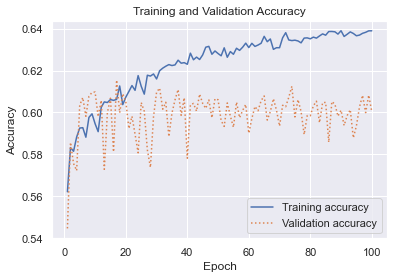

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

500/500 [==============================] - 0s 546us/step


Text(89.18, 0.5, 'Actual')

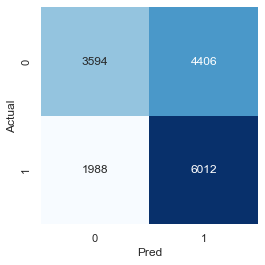

In [97]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Pred')
plt.ylabel('Actual')

In [98]:
sum(y_test)

8000

In [99]:
2318/5664

0.4092514124293785

In [100]:
(2318+1422)/sum(y_test)

0.4675

In [101]:
(2*0.40*0.66)/(0.40+0.66)

0.4981132075471698

In [102]:
10/16

0.625

In [103]:
6/8

0.75

In [104]:
6/10

0.6